In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

# Complete function to fetch All comments from any post

In [2]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")
from dateutil import tz
from psaw import PushshiftAPI
api = PushshiftAPI()# Set display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
url = input('Please enter reddit post url: ')
sub_match = re.findall(r'/r/\.?([ \d\w.]+)', url)
post_id_match = re.findall(r'/comments/\.?([ \d\w.]+)', url)
subreddit = sub_match[0]
post_id = post_id_match[0]
print('\nFetching comments now :)')
gen = api.search_comments(subreddit=subreddit, link_id=post_id)
max_response_cache = 3000
cache = []
for c in gen:
    cache.append(c)# Omit this test to actually return all results. Wouldn't recommend it though: could take a while, but you do you.
    if len(cache) >= max_response_cache:
        break# If you really want to: pick up where we left off to get the rest of the results.
if False:
    for c in gen:
        cache.append(c)
        
df = pd.DataFrame([thing.d_ for thing in cache])
df_comments = df[['author','author_flair_text','created','body','gilded','gildings','score']]
df_time_cleaned = df_comments.copy()
df_time_cleaned['created'] = pd.to_datetime(df_time_cleaned['created'], unit = 's', utc=True).dt.tz_convert('Asia/Kolkata')
df_time_cleaned = df_time_cleaned.sort_values(by='created', ascending=False)
df_final = df_time_cleaned
print('\nTotal comments fetched from post:',len(df_final['body']))
df_final

Please enter reddit post url: https://www.reddit.com/r/nba/comments/x7pkv5/patrick_beverley_on_playing_with_lebron_james_and/

Fetching comments now :)

Total comments fetched from post: 985


,author,author_flair_text,created,body,gilded,gildings,score
0,[deleted],None,2022-09-07 17:54:17+05:30,[removed],0,{},1
1,[deleted],None,2022-09-07 17:53:47+05:30,[removed],0,{},1
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,"Own those bums, Bev.",0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,I know how that works,0,{},1
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,Based on what?,0,{},1
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,"Then they were not being clear at all, because in the context of the conversation it seemed like they were trying to make the exact opposite point.",0,{},1
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,He is obviously joking…,0,{},1
7,SunstormGT,:min-1: Timberwolves,2022-09-07 17:21:33+05:30,Facts,0,{},1
8,theseabeast,:den-1: Nuggets,2022-09-07 17:18:53+05:30,"Thats Blue Lock Logic, I'm here for it.",0,{},1
9,dzDiyos,None,2022-09-07 17:18:48+05:30,"dk why you're downvoted, I personally don't like his style of play. He's a dog, he's a hustler, 100% energy for four quarters, but he looks to hurt people and I dislike that. could be someone's career, you know?",0,{},1


In [96]:
df_final.head()

,author,author_flair_text,created,body,gilded,gildings,score
0,[deleted],None,2022-09-07 17:54:17+05:30,[removed],0,{},1
1,[deleted],None,2022-09-07 17:53:47+05:30,[removed],0,{},1
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,"Own those bums, Bev.",0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,I know how that works,0,{},1
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,Based on what?,0,{},1


In [97]:
df2 = df_final.copy()
df2.head()

,author,author_flair_text,created,body,gilded,gildings,score
0,[deleted],None,2022-09-07 17:54:17+05:30,[removed],0,{},1
1,[deleted],None,2022-09-07 17:53:47+05:30,[removed],0,{},1
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,"Own those bums, Bev.",0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,I know how that works,0,{},1
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,Based on what?,0,{},1


In [98]:
df2.shape

(985, 7)

# Text/Data Cleaning

In [99]:
##removing comments which are removed by users
df2 = df2[~(df2['body']=='[removed]')]
print(df2.shape)
df2.head()

(953, 7)


,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,"Own those bums, Bev.",0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,I know how that works,0,{},1
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,Based on what?,0,{},1
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,"Then they were not being clear at all, because in the context of the conversation it seemed like they were trying to make the exact opposite point.",0,{},1
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,He is obviously joking…,0,{},1


In [100]:
### 1. Lowercasing
df2['body'] = df2['body'].apply(lambda x : " ".join(x.lower() for x in x.split()))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,"own those bums, bev.",0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,i know how that works,0,{},1


In [101]:
### 2.Punctuation Removal

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [102]:
df2['body'] = df2['body'].apply(lambda x : "".join(i for i in x if i not in string.punctuation))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,own those bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,i know how that works,0,{},1


In [103]:
### 3.Removing stopwords
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
df2['body'] = df2['body'].apply(lambda x: ' '.join(x for x in x.split() if x not in allstopwords))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1


In [104]:
### 4.remove whitespaces
df2['body'] = df2['body'].apply(lambda x : " ".join(x.strip() for x in x.split()))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1


In [106]:
### 5.Remove URLS

df2['body'] = df2['body'].apply(lambda x:re.sub(r"http\S+", "", x))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1


In [107]:
# 6. Substituting multiple spaces with single space
df2['body'] = df2['body'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1


In [108]:
# 7.to remove all emojis
df2['body'] = df2['body'].apply(lambda x:x.encode('latin-1','ignore').decode('latin-1'))
df2.head(2)

,author,author_flair_text,created,body,gilded,gildings,score
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1


In [109]:
' '.join(df2['body'].tolist())

'bums bev know works based clear context conversation seemed like trying make exact opposite point obviously joking facts thats blue lock logic im dk youre downvoted personally dont like style play hes dog hes hustler 100 energy four quarters looks hurt people dislike could someones career know cant wait halfway season publicly call ad russ first take demand traded comes retirement play magic since beverley wildly inefficient thats close true truly blessed talent mediums available capture predict one kind season begins would possibly know westbrook pat bev actually dont want play smh people cant parse trash talk live bravo real housewives drama men pretend world would possibly know lmaoooo random guy reddit parties la conway confirm fuck pat bev calls like unless personally talked westbrook hes said dont want play pat bev respectfully stfu association brotherhood competitors love court compete players actually real beef saw trash lol tool slapahhhs patbev adrenaline soul rnba squared c

In [122]:
df2 = df2[~(df2['author']=='[deleted]')]

### Data Is cleaned

# Feature Engineering

In [110]:
from textblob import TextBlob
## 1.Adding Polarity Feature
df2['polarity'] = df2['body'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2.head()

,author,author_flair_text,created,body,gilded,gildings,score,polarity
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1,0.000000
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1,0.000000
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,based,0,{},1,0.000000
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,clear context conversation seemed like trying make exact opposite point,0,{},1,0.116667
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,obviously joking,0,{},1,0.000000


In [111]:
## 2.Body Length
df2['body_len'] = df2['body'].apply(lambda x: len(x))
df2.head()

,author,author_flair_text,created,body,gilded,gildings,score,polarity,body_len
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1,0.000000,8
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1,0.000000,10
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,based,0,{},1,0.000000,5
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,clear context conversation seemed like trying make exact opposite point,0,{},1,0.116667,71
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,obviously joking,0,{},1,0.000000,16


In [112]:
## 3.Word Count
df2['word count'] = df2['body'].apply(lambda x: len(x.split()))
df2.head()

,author,author_flair_text,created,body,gilded,gildings,score,polarity,body_len,word count
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1,0.000000,8,2
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1,0.000000,10,2
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,based,0,{},1,0.000000,5,1
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,clear context conversation seemed like trying make exact opposite point,0,{},1,0.116667,71,10
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,obviously joking,0,{},1,0.000000,16,2


In [113]:
## 4.Adding sentiment
df2['sentiment'] = np.where(df2['polarity']>=0.1,'positive','negative')
df2.head()

,author,author_flair_text,created,body,gilded,gildings,score,polarity,body_len,word count,sentiment
2,pinkturtlezaj,None,2022-09-07 17:52:43+05:30,bums bev,0,{},1,0.000000,8,2,negative
3,escabean,None,2022-09-07 17:40:18+05:30,know works,0,{},1,0.000000,10,2,negative
4,The_Zeus_Is_Loose,None,2022-09-07 17:35:56+05:30,based,0,{},1,0.000000,5,1,negative
5,Dirty_Virmling,:cle-1: Cavaliers,2022-09-07 17:31:00+05:30,clear context conversation seemed like trying make exact opposite point,0,{},1,0.116667,71,10,positive
6,SunstormGT,:min-1: Timberwolves,2022-09-07 17:23:26+05:30,obviously joking,0,{},1,0.000000,16,2,negative


# EDA

In [123]:
### flair count
flair = df2['author_flair_text'].value_counts()[:12]

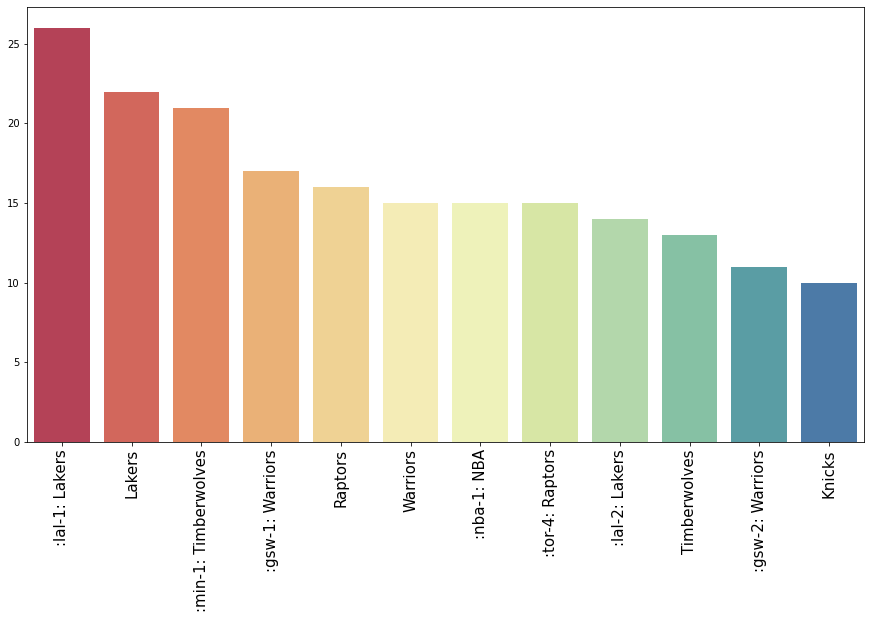

In [124]:
plt.figure(figsize=(15,8))
sns.barplot(x = flair.keys(),y=flair.values,palette='Spectral')
plt.xticks(rotation=90,fontsize=15)
plt.show();

<AxesSubplot:xlabel='sentiment', ylabel='count'>

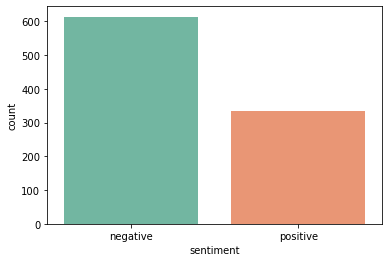

In [125]:
### Sentiment Distribution

sns.countplot(df2['sentiment'],palette='Set2')

<AxesSubplot:xlabel='word count', ylabel='Count'>

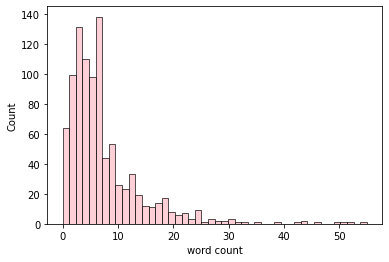

In [126]:
## Word count dist
sns.histplot(df2['word count'],color='pink')

<AxesSubplot:xlabel='body_len', ylabel='Count'>

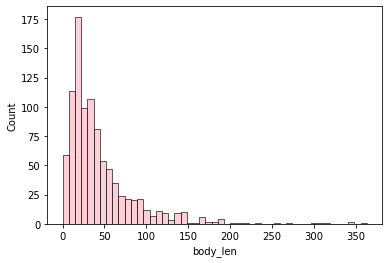

In [127]:
### body len distribution
sns.histplot(df2['body_len'],color='pink')

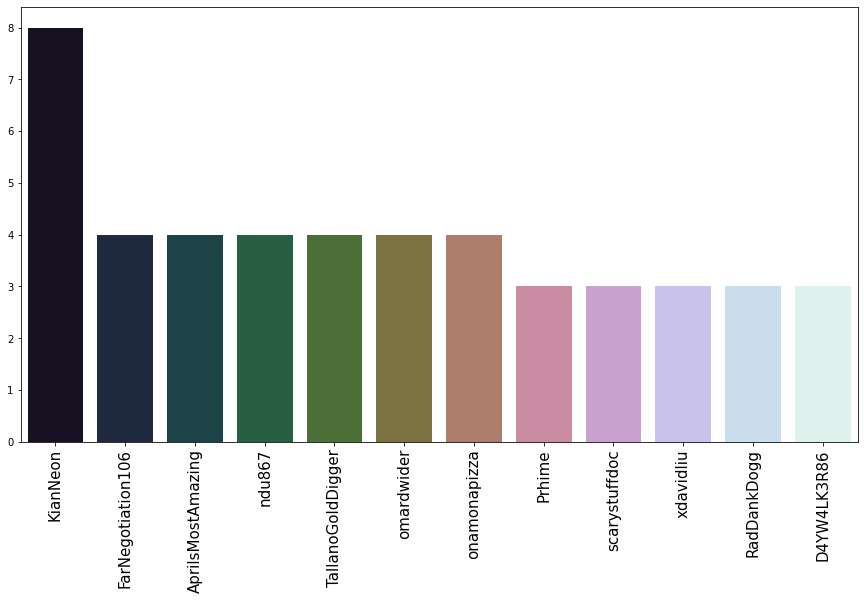

In [128]:
## top 10 users
users = df2['author'].value_counts()[:12]
plt.figure(figsize=(15,8))
sns.barplot(x = users.keys(),y=users.values,palette='cubehelix')
plt.xticks(rotation=90,fontsize=15)
plt.show();

In [145]:
df2[df2['author']=='KianNeon']

,author,author_flair_text,created,body,gilded,gildings,score,polarity,body_len,word count,sentiment
73,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 14:48:23+05:30,cuz hes kind available,0,{},1,0.50,22,4,positive
305,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 06:12:56+05:30,people gonna pissed dude turns winning team,0,{},1,0.50,43,7,positive
444,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 04:15:50+05:30,wait lebron things,0,{},1,0.00,19,3,negative
448,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 04:14:26+05:30,dawg,0,{},1,0.00,4,1,negative
455,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 04:09:04+05:30,teams hes played miss reverse russ,0,{},1,0.00,34,6,negative
457,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 04:08:16+05:30,every team pat bev plays fans misses every team russ theyre glad hes gone,0,{},1,0.50,73,14,positive
461,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 04:07:10+05:30,isnt one favorite players youre missing,0,{},1,0.15,39,6,positive
484,KianNeon,:lac-1: [LAC] Jay Scrubb,2022-09-07 03:53:56+05:30,pat bev isnt one favorite players arent enjoying basketball much us,0,{},1,0.40,67,11,positive


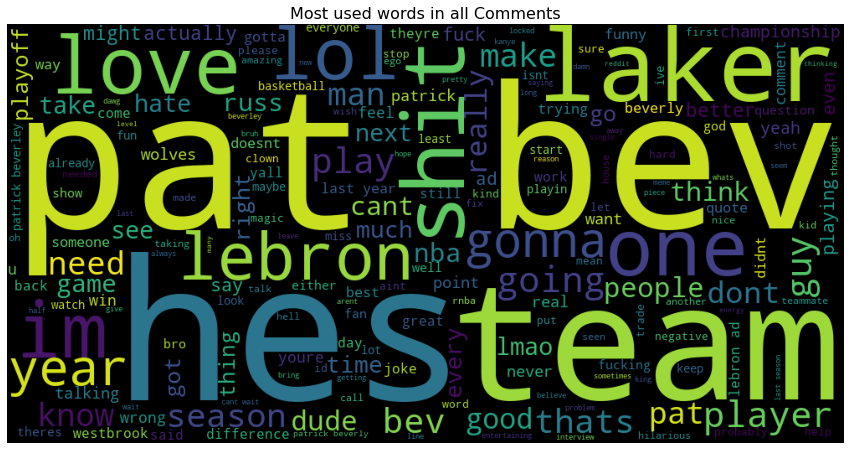

In [131]:
### Word Cloud Visualisation
#1 All Comments

all_words = pd.Series(' '.join(df2['body']).split())
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all Comments", size=16)

plt.axis("off")
plt.show()

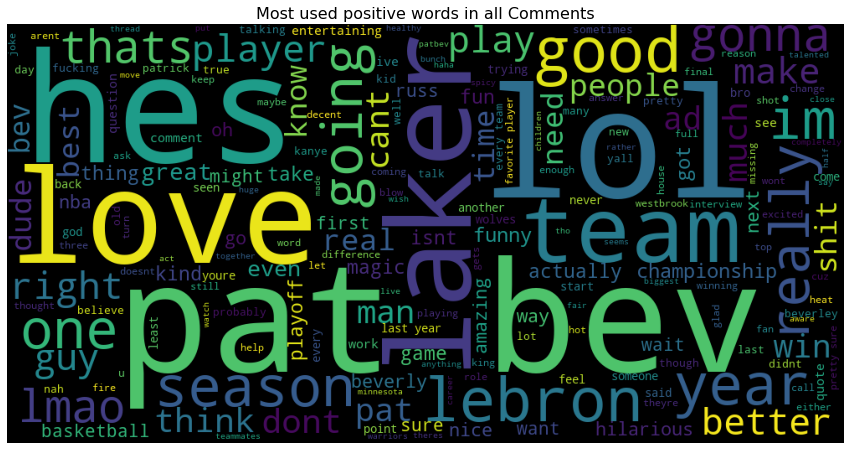

In [133]:
## positive comments
positiveWords = pd.Series(' '.join(df2[df2['sentiment']=='positive']['body']).split())
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used positive words in all Comments", size=16)

plt.axis("off")
plt.show()

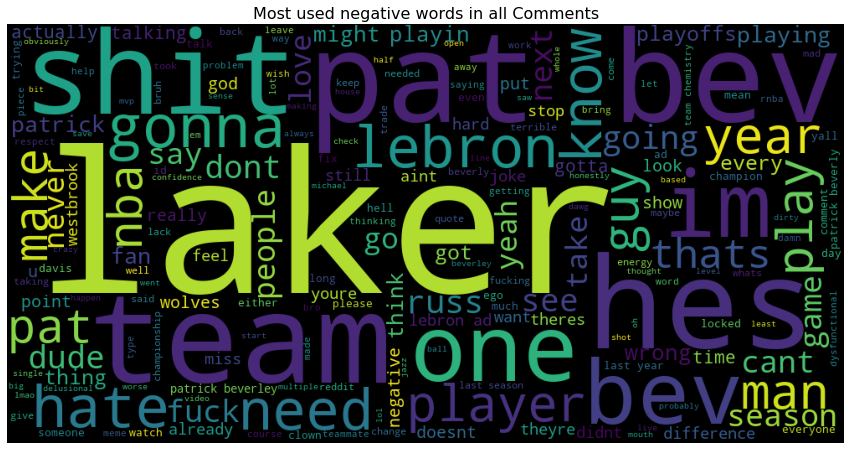

In [134]:
## negative comments
negativeWords = pd.Series(' '.join(df2[df2['sentiment']=='negative']['body']).split())
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used negative words in all Comments", size=16)

plt.axis("off")
plt.show()

In [135]:
### Freq distribution of words
import nltk
from nltk.probability import FreqDist

In [141]:
all_words = []
for sentence in df2['body']:
    all_words.extend(sentence.split())
nltk.FreqDist(all_words)

FreqDist({'bev': 132, 'pat': 131, 'hes': 99, 'lakers': 83, 'like': 81, 'team': 80, 'shit': 53, 'lebron': 52, 'im': 51, 'one': 49, ...})